In [12]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
len(x_train)

60000

In [15]:
len(x_test)

10000

In [16]:
x_test[0].shape

(28, 28)

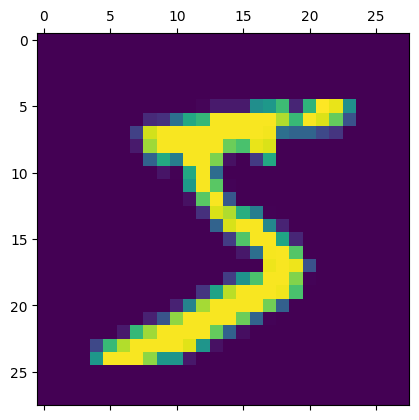

In [17]:
plt.matshow(x_train[0])

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train/255.0
x_test = x_test/255.0

In [20]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)
x_test_flatten.shape

(10000, 784)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5


c:\Documents\VS_code\tensorflow\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8141 - loss: 0.7129
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9141 - loss: 0.3113
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9205 - loss: 0.2821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9238 - loss: 0.2756
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9250 - loss: 0.2700


In [22]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9139 - loss: 0.3036


[0.2665313184261322, 0.9259999990463257]

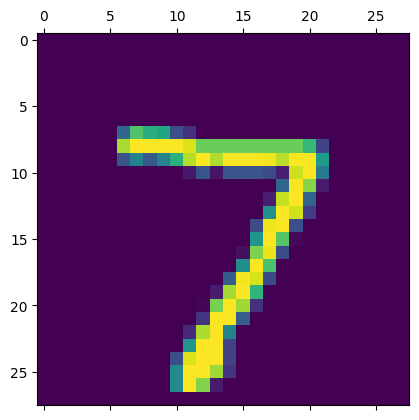

In [23]:
plt.matshow(x_test[0])

In [34]:
y_predicted = model.predict(x_test_flatten)
np.argmax(y_predicted[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


np.int64(7)

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [36]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,   10,  919,   22,    9,    3,   11,   10,   37,    4],
       [   1,    0,   15,  936,    1,   18,    2,    9,   19,    9],
       [   1,    1,    4,    1,  922,    0,    8,    3,    9,   33],
       [   8,    2,    3,   45,   11,  769,   11,    7,   30,    6],
       [  11,    3,    7,    1,    8,   16,  907,    2,    3,    0],
       [   1,    7,   22,   10,   10,    1,    0,  938,    1,   38],
       [   8,   10,    5,   30,    9,   25,    8,   10,  860,    9],
       [  11,    7,    1,   13,   28,    5,    0,   13,    4,  927]],
      dtype=int32)>

Text(45.722222222222214, 0.5, 'Truth')

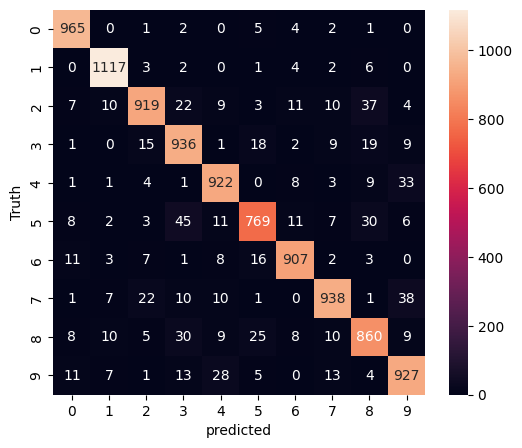

In [46]:
import seaborn as sn
plt.figure( figsize=(6, 5) )
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

## Adding More Hidden Layer to Improve Performance

In [43]:
model = keras.Sequential([
    keras.layers.Dense(150, input_shape=(784, ), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid') #input shape will bw onfered from the previous layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8374 - loss: 0.6398
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9408 - loss: 0.2066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9571 - loss: 0.1461
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.1088
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9764 - loss: 0.0834


In [44]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9660 - loss: 0.1060


[0.0945734903216362, 0.9703999757766724]

Text(45.722222222222214, 0.5, 'Truth')

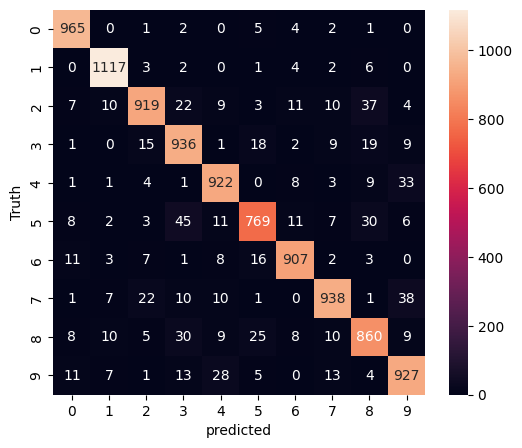

In [47]:
plt.figure( figsize=(6, 5) )
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

## With Keras Default Flatten Function

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # instead of using flatted array
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid') #input shape will bw onfered from the previous layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

c:\Documents\VS_code\tensorflow\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8429 - loss: 0.6359
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9405 - loss: 0.2087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9589 - loss: 0.1437
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9694 - loss: 0.1050
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0836
